# READ ME: 2021_03_25

Las partes de las notas teóricas de esta clase las he incluido en la clase I de este día, con el sufijo edited.

Las partes prácticas están incluidas todas en el Class LM Edited

In [ ]:
# Base -----------------------------------------------------------
import pandas as pd
import numpy as np

# Viz ------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')

# Models ---------------------------------------------------------
from statsmodels.formula.api import ols
import statsmodels.stats.anova as aov
import scipy.stats as ss
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.outliers_influence as sso

from google.colab import drive
drive.mount('IEXL')

Drive already mounted at IEXL; to attempt to forcibly remount, call drive.mount("IEXL", force_remount=True).


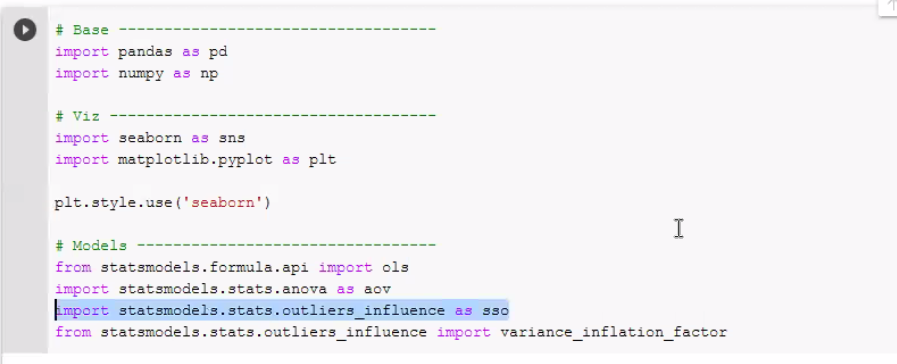

In [ ]:
gifted = pd.read_csv('/content/IEXL/MyDrive/Math&Stats/2021_03_05_Class/gifted.csv')
gifted.head()

score  fatheriq  motheriq  speak  count  read  edutv  cartoons
0    159       115       117     18     26   1.9   3.00      2.00
1    164       117       113     20     37   2.5   1.75      3.25
2    154       115       118     20     32   2.2   2.75      2.50
3    157       113       131     12     24   1.7   2.75      2.25
4    156       110       109     17     34   2.2   2.25      2.50

In [ ]:
model = ols('score ~ fatheriq + motheriq + speak + count + read + edutv + cartoons',
            data=gifted).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     11.97
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           5.80e-07
Time:                        11:45:40   Log-Likelihood:                -80.825
No. Observations:                  36   AIC:                             177.7
Df Residuals:                      28   BIC:                             190.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.5085     24.026      3.143      0.0

Procedure Juanjo will deny he has told us to see if 

Backward stepwise selection: fit with everything and try to remove 1 by 1
Forward stepwise selection: you add variable by value

True procedure

ACAICE.... @Min02 in one of the recordings.
- BAYESIAN ESTIMATION. HE DOES NOT HAVE TIME. ASK.

You fit all the models with one single variable. You see the one with the smallest acaice... you keep that... @min 03...

At each step you need to do a lot of fits.

You finish when the next value of the AKAIKE is not improving the one that you had before. Which metrics are these...

Since you do not want to do forwardly... 

You do it in practice the variables from highest to lowest p-value. This is an easier strategy, it usually works... IT CAN LEAD YOU TO A BIAS ESTIMATION.... the problem with these things of maximum and minimum is that YOU MIGHT GET TO A LOCAL MINIMUM, which is not a minimum.

In [ ]:
#Remove count
model = ols('score ~ fatheriq + motheriq + speak + read + edutv + cartoons',
            data=gifted).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     14.06
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           1.92e-07
Time:                        11:45:40   Log-Likelihood:                -81.207
No. Observations:                  36   AIC:                             176.4
Df Residuals:                      29   BIC:                             187.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.7756     23.858      3.176      0.0

In [ ]:
#Remove speak
model = ols('score ~ fatheriq + motheriq + read + edutv + cartoons',
            data=gifted).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     16.54
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           7.67e-08
Time:                        11:45:40   Log-Likelihood:                -81.927
No. Observations:                  36   AIC:                             175.9
Df Residuals:                      30   BIC:                             185.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.0468     23.740      3.330      0.0

Ok, for a ten percent, it looks like we can keep the p-values seeing these variables.

Adjusted R Squared: 0.689 is the percentage that we can explain (@min7)

In [ ]:
# Lets see the residuals
model.resid

0     4.132011
1     1.830060
2    -4.162415
3    -1.049545
4     0.289326
5    -2.965212
6    -1.282072
7    -2.095563
8     0.032145
9     1.052954
10   -2.913709
11   -3.175735
12    0.545313
13    2.027851
14   -0.032642
15    2.144326
16    0.810266
17   -3.033622
18   -0.753778
19   -3.784193
20    0.510964
21    2.533397
22    1.158441
23    6.412153
24   -1.671091
25   -0.583258
26   -1.458079
27    0.793558
28    1.010249
29   -1.678636
30   -0.613015
31    0.654459
32    2.250039
33    2.626853
34    3.446780
35   -3.008580
dtype: float64

In [ ]:
residuals = model.resid
n = model.nobs
K = len(model.model.exog[0])-1
RSE = np.sqrt(sum(residuals**2)/(n-K-1))
print(RSE)

2.5804720295751284


On average, the IQ of these gifted children is going to be 2.58 away from my prediction.

With linear models I am not going to make predictions, so we are going to make:

- Inference (what is the impact)
- See if the data seems to have a linear relationship.

Interpretation of the slope:
For every month less that it took these guys 

For each extra month that it took these guys to read, their IQ increased on average eleven points.

@ 16:00
If you do not include relevant variables, the values of the coefficients also change. It may be that we find a new variable that makes the contributions of the other variables change.

### PRIOR TO THIS IS DAY 5th of MARCH

### BELOW THIS IT IS 6th of MARCH

READ GIFTED MODEL DOCUMENT

At some point around class 20

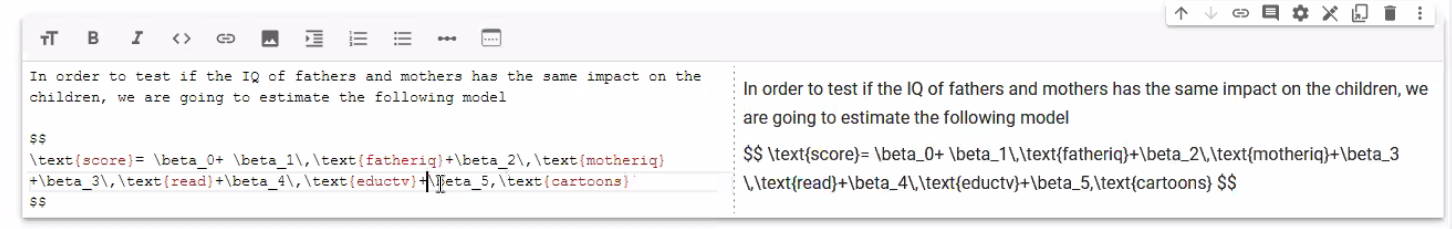

We will noew test if the impact of mother_iq is equal to the impact of father_iq

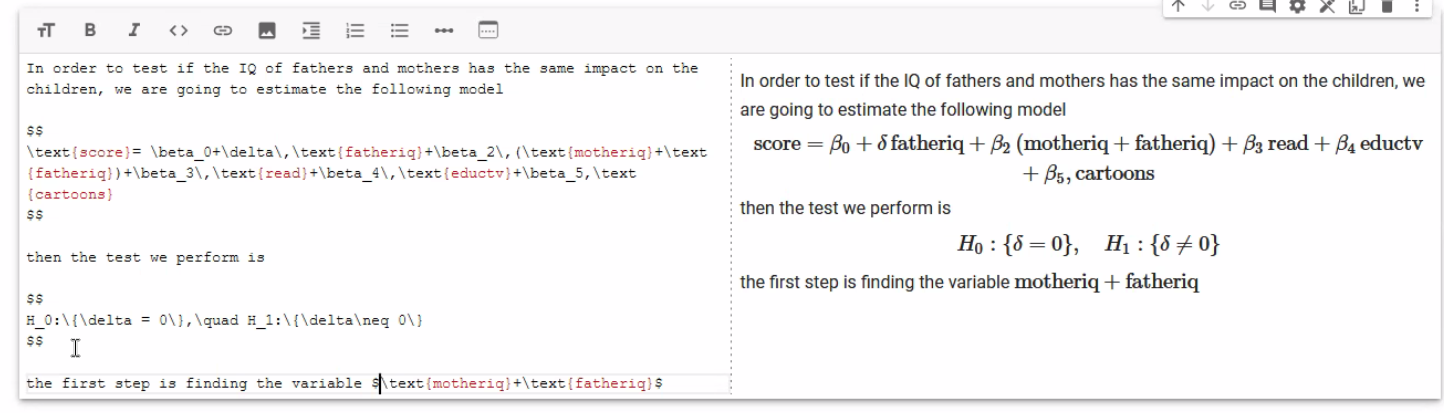

In [ ]:
gifted['parentsiq'] = gifted['motheriq'] + gifted['fatheriq']

model_2 = ols('score ~ fatheriq + parentsiq + read + edutv + cartoons',
            data=gifted).fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     16.54
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           7.67e-08
Time:                        11:45:40   Log-Likelihood:                -81.927
No. Observations:                  36   AIC:                             175.9
Df Residuals:                      30   BIC:                             185.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.0468     23.740      3.330      0.0

Note that the model summary statistics DO NOT CHANGE, we have just grouped things in a different manner.

We see that the p_val associated to fathersiq is greater than alpha (0.274). We therefore fail to reject the null hypothesis. Which means that both the fathers and mothers iq are relevant.

Now we are going to test if the iq of the parents are relevant to understand the iq of the children.

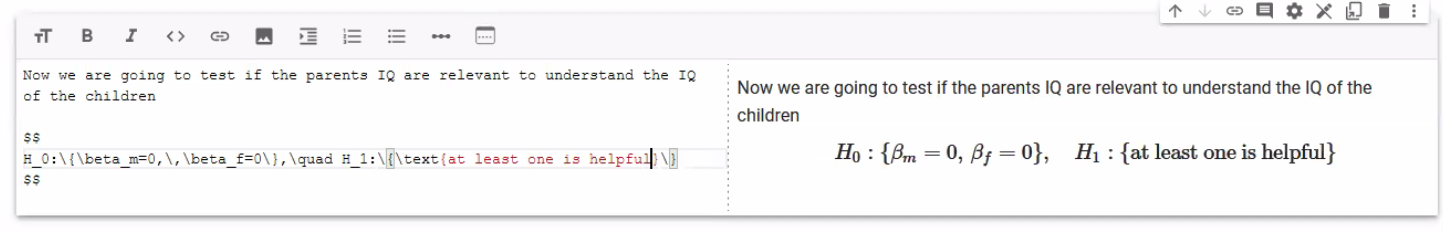

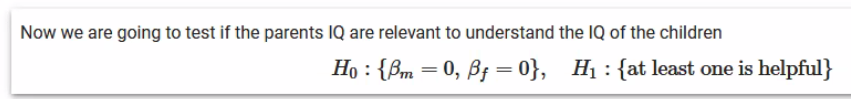

@Min 48.

There are two mthods. We are going to follow one in which requires both the unrestricted and the restricted model.

In [ ]:
model_rest = ols('score ~ read + edutv + cartoons', data = gifted).fit()

In [ ]:
aov.anova_lm(model_rest, model)

df_resid         ssr  df_diff     ss_diff          F    Pr(>F)
0      32.0  445.979629      0.0         NaN        NaN       NaN
1      30.0  199.765077      2.0  246.214552  18.487807  0.000006

What is interesting is what is happening with the bottomright value. It is smaller than the significance leve, so we reyect the null hypothesis. It is the Probability(>Fisher)...

Nul hypothesis rejected. So we reject the NULL hypothesis and cocnluded that there is evidence against it or in favor of the alternative, meaning that at least one (maybe both... we dont know...) of the variables is relevant to explian the variability of the response.

To say if it is one or both we could go to individual t-test or, much, much better to AKAIKE or Bayes information.

### CLASS EXERCICSE: LOAD THE DATASET HSB

@View part of the video from 10:30 something --> @beginning of this video.

We are interested in the science grades (that is going to be my response). I want to understand if the grades that these guys have in every other course are relevant to explain the grades of science.

We need to compare as well if the effect of read and write is the same.

And if the varibility in humanities helps me understand 

**IN ADDITION TO THIS, DOWNLOAD CLASS LM FRON JUANJO'S DRIVE. THIS IS WHAT HE DID**

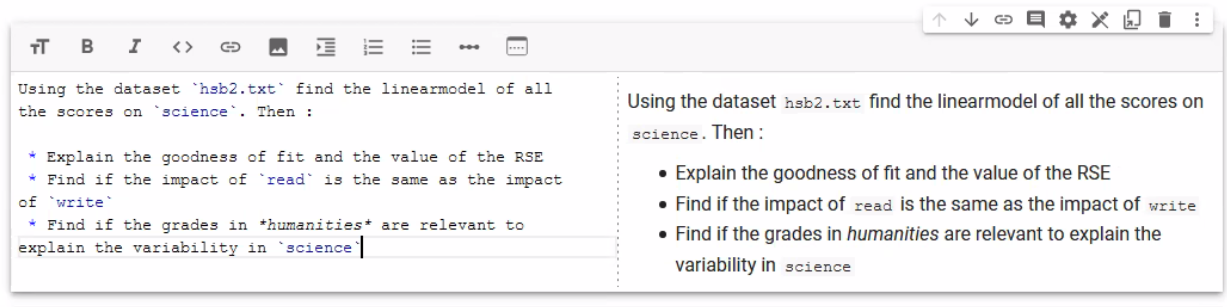

In [ ]:
grades = pd.read_csv('/content/IEXL/MyDrive/Math&Stats/2021_02_13_M_Stats/Data Sets/hsb2.txt', sep = '\t')

In [ ]:
grades.head()

id  gender   race     ses  schtyp  ... read  write  math  science  socst
0   70    male  white     low  public  ...   57     52    41       47     57
1  121  female  white  middle  public  ...   68     59    53       63     61
2   86    male  white    high  public  ...   44     33    54       58     31
3  141    male  white    high  public  ...   63     44    47       53     56
4  172    male  white  middle  public  ...   47     52    57       53     61

[5 rows x 11 columns]

In [ ]:
model = ols('science ~ read + write + math + socst',
            data=grades).fit()
            
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                science   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     48.80
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           2.11e-28
Time:                        11:45:40   Log-Likelihood:                -672.44
No. Observations:                 200   AIC:                             1355.
Df Residuals:                     195   BIC:                             1371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5657      3.231      2.651      0.0

#### Explain the goodness of fit and the value of the RSE

The F-statistic is the overall relevance. That means that the model is relevant.

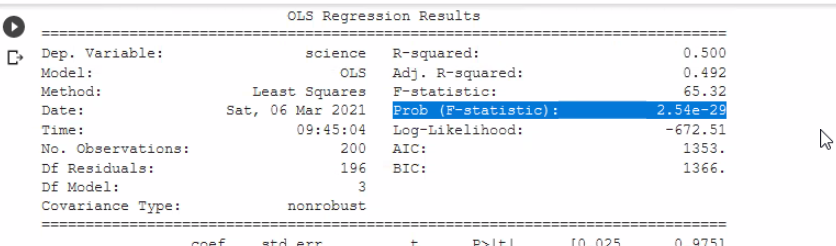

The model is relevant 

#### Is the effect of social science relevant

In [ ]:
#Juanjo's cutre's procedure. Ask him why this procedure is shitty.
# Lets say we set a goal of 10% socst
# Remove socst
model = ols('science ~ read + write + math',
            data=grades).fit()
            
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                science   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     65.32
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           2.54e-29
Time:                        11:45:40   Log-Likelihood:                -672.51
No. Observations:                 200   AIC:                             1353.
Df Residuals:                     196   BIC:                             1366.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4074      3.193      2.633      0.0

It looks like for a 10% we can say that this subjects are relevant.

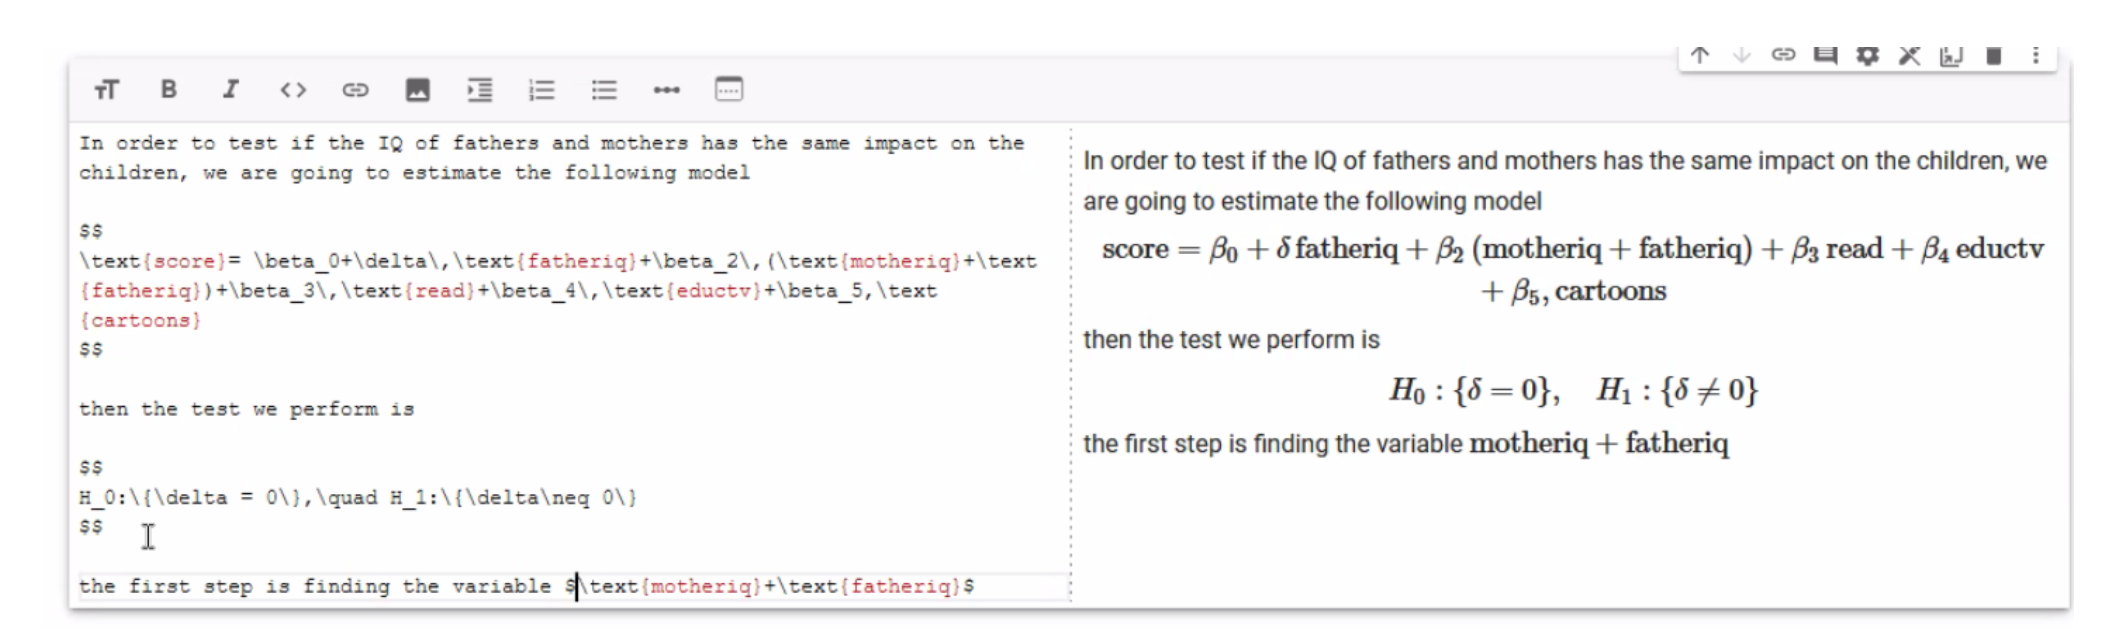

In [ ]:
#Now we want to compare if the effect of read and write are the same
grades['rd_wr'] = grades['read'] + grades['write']

model_2 = ols('science ~ read + rd_wr + math',
            data=grades).fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                science   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     65.32
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           2.54e-29
Time:                        11:45:40   Log-Likelihood:                -672.51
No. Observations:                 200   AIC:                             1353.
Df Residuals:                     196   BIC:                             1366.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4074      3.193      2.633      0.0

We fail to reject the null hypothesis, which means that both read and write are relevant and that their effect is similar.

There is a different way of making this test instead of finding the restricted model

@Min05:

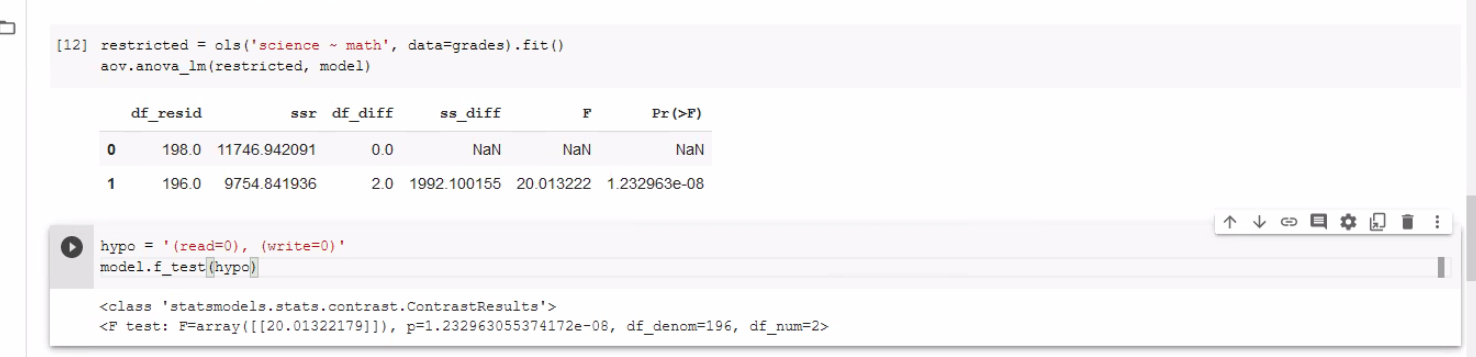

### We now need to be sure that the model is right - VALIDATION PROCESS

Loss function, penalty functions... you may use other... if you use for example absolute value... you obtain quantile regression... (regression to the median). You can choose many. We are now working with MSE, which results in linear regression.

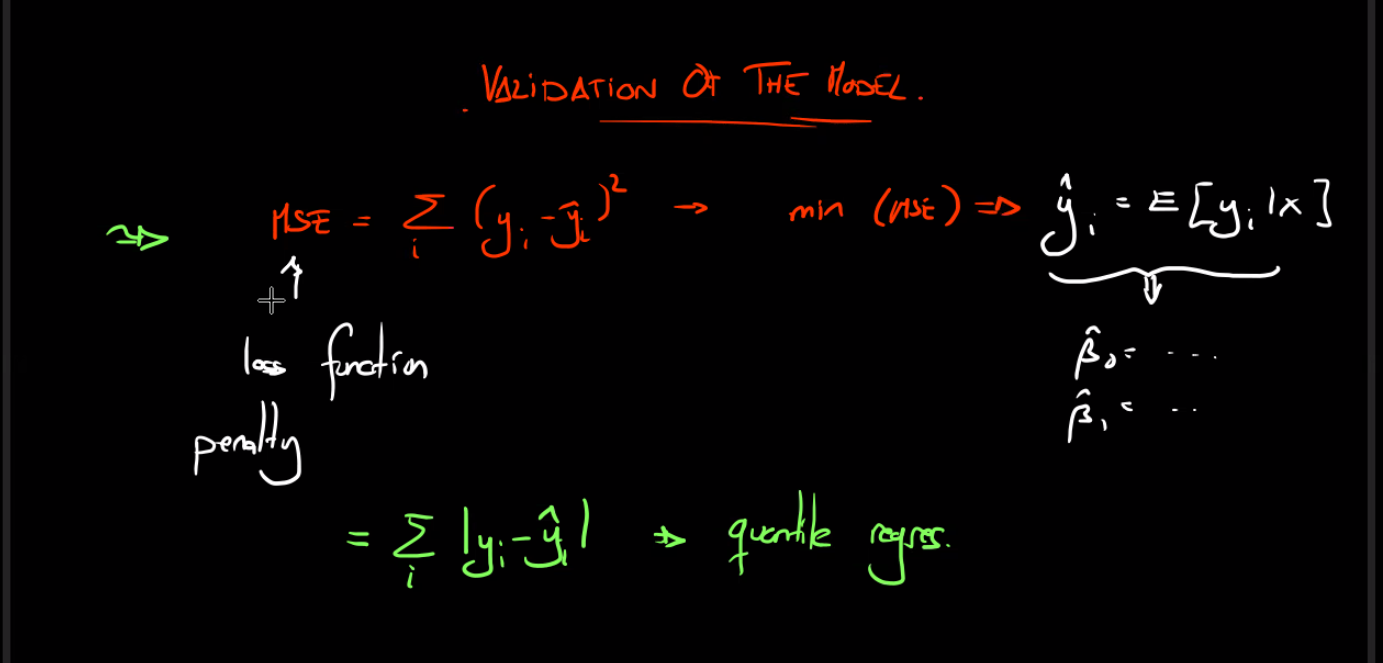

In machine learning we will see this is not the only way of measuring distances. In general we will consider the Lp norm.

$L_2 norm$ is the usual sum of squares

In many different cases you need other distances. e.g.: in clusters you need to know what means "far" in the cluster.

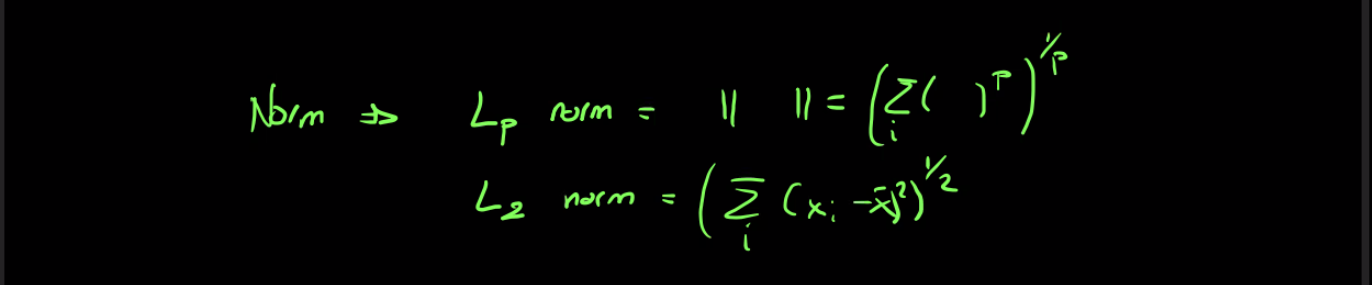

Hilbert spaces: instead of spaces of points, they are spaces of functions... espacios de dimension infinita. Hablar con Jose o Álvarez?

### BACK TO THE CLASSROM - GAUSS MARKOV THEOREM

Observe that we might have unbiased estimators (on the slopes) even though the model is biased

@mIN 13

When one studies linear model for the first time it looks like normality is key... in reality I JUST CARE IF THE RESIDUALS ARE NORMALLY DISTRIBUTED

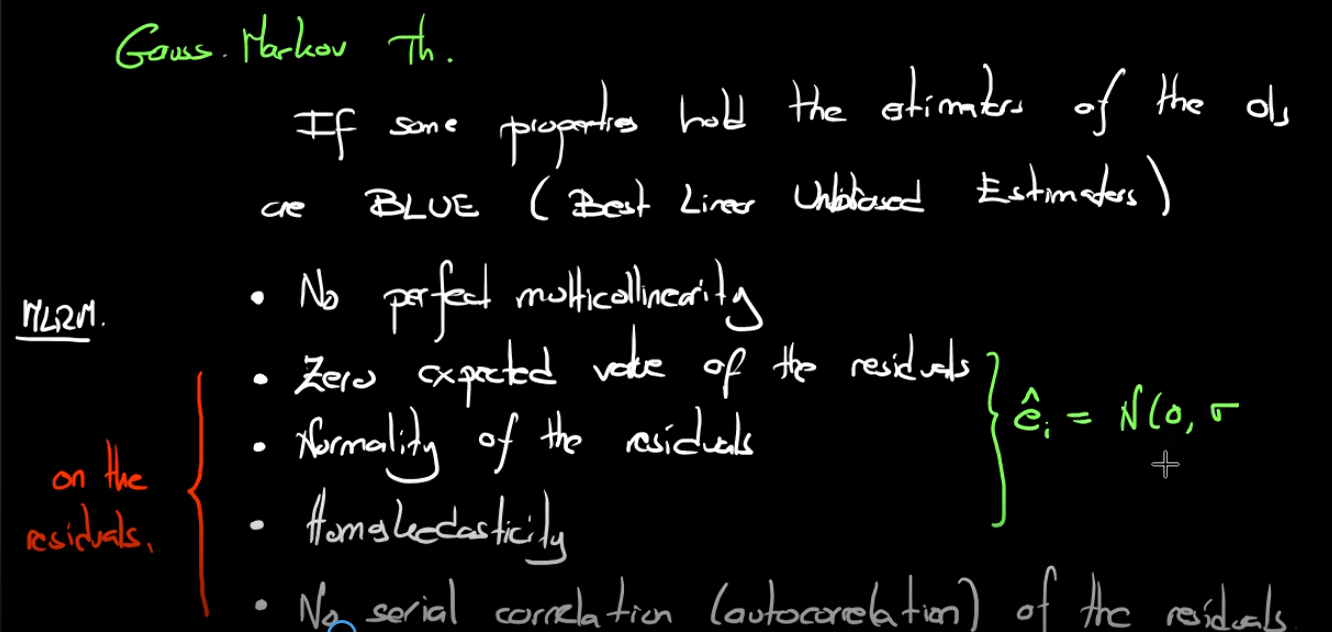

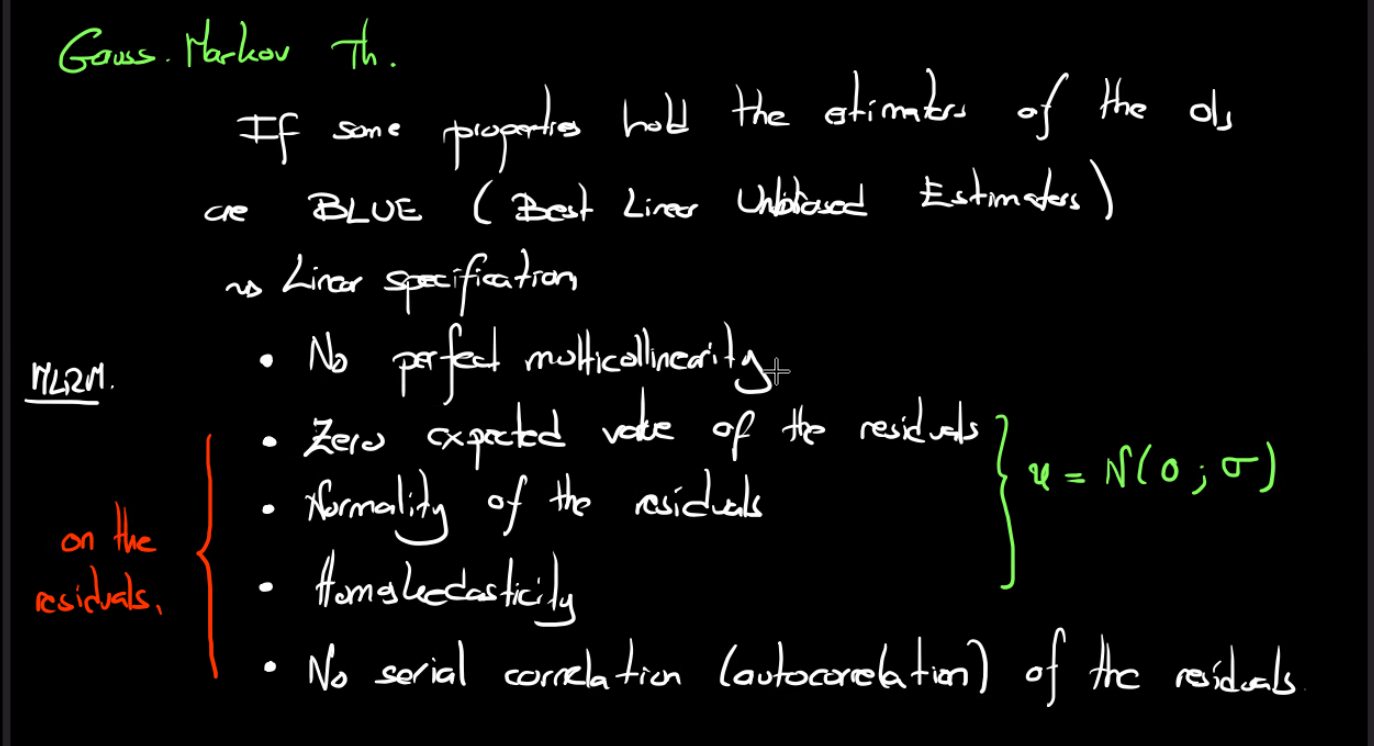

### MODEL CONSTRUCTION

First thing that you need to do is check for multicollinearity. If you have probems with multicollinearity, then you remove some variables.

Lag variable --> delay variables

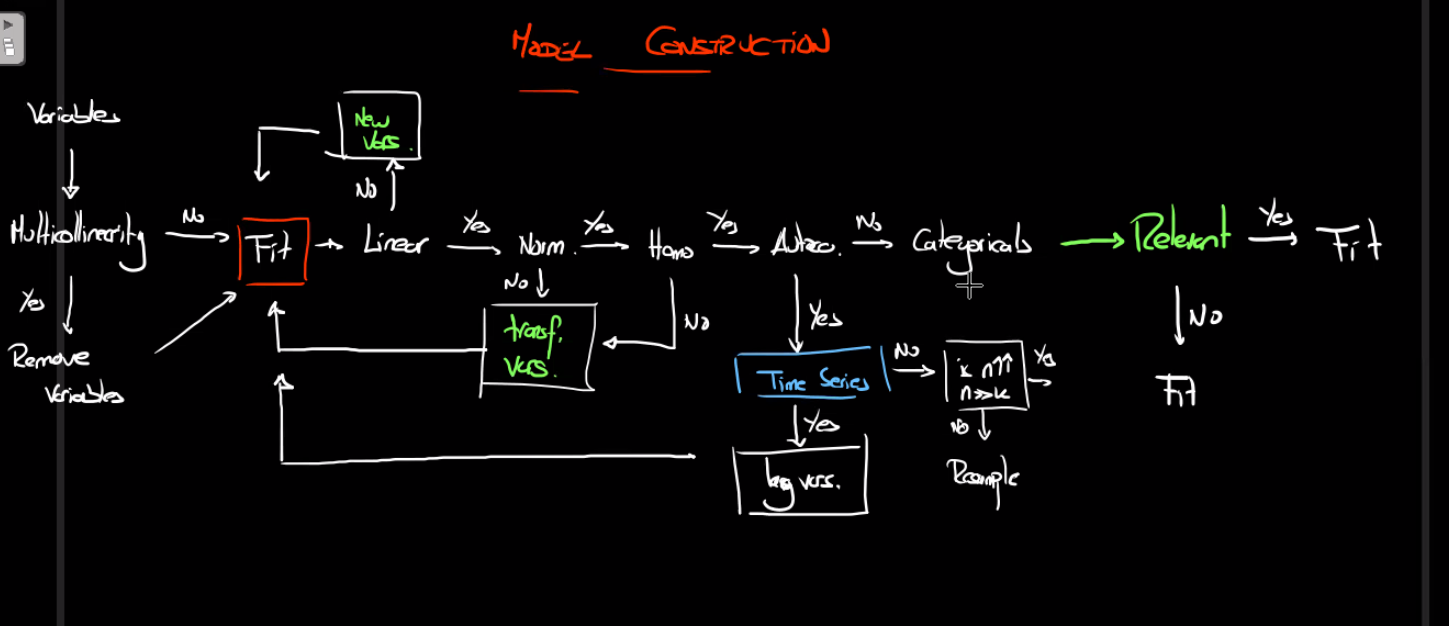

In the "NO" --> FIT --> You dont include the variable sand you are done.

in the n>>k --> Yes --> you STOP. Move to another thing. Ask Juanjo.

Maybe you also have another model... then you need tests to compare with the other models...

@Min28 --> then you have some McKinnon Tests... etc...

Which tests are used for each thing

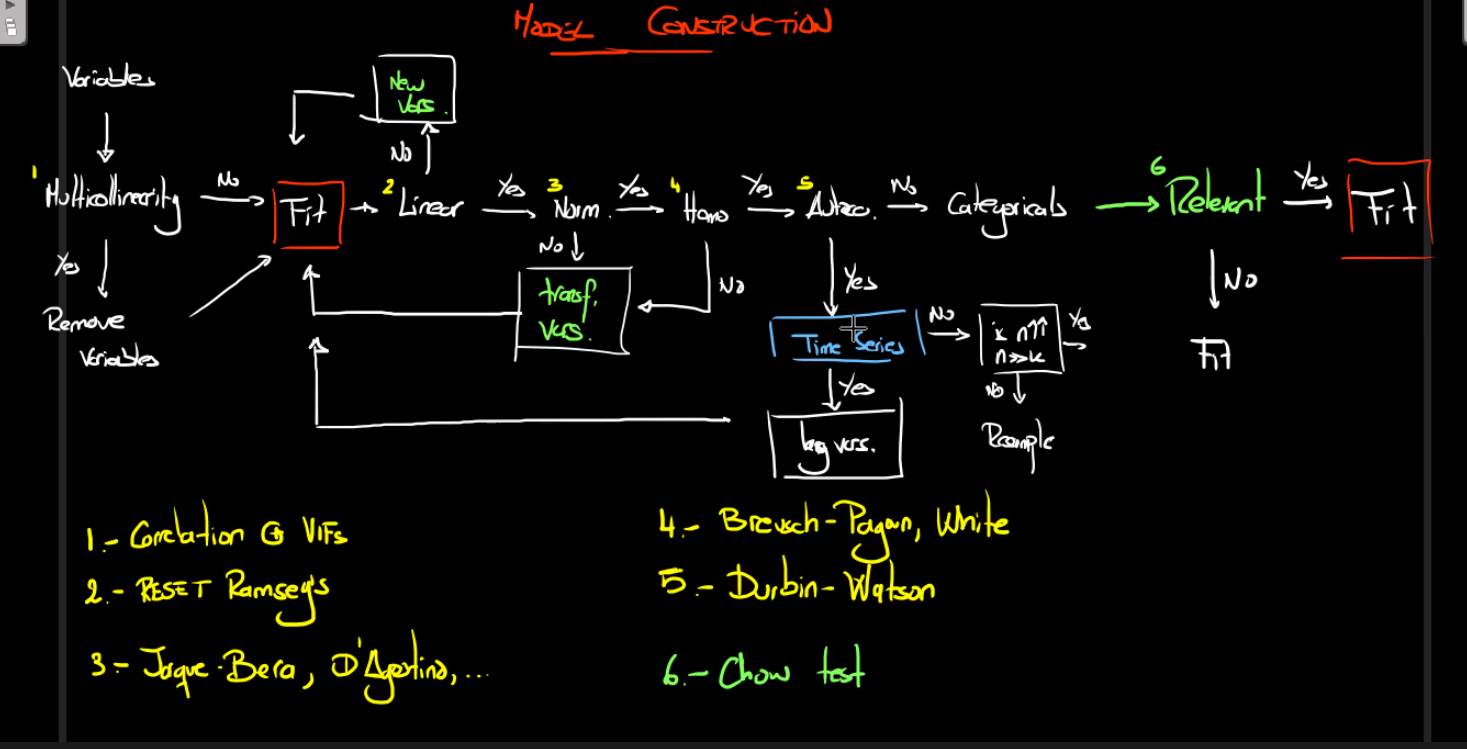

REgarding the transformation of variables...

It depends on whether you are transforming the dependent or the independent variables

The most typical thing when hooskedasticity is lost.

- You put the target in logs... and if it does not work, you move to the general linear model @33.

- @min 34 onwards: comments about transformations.

When you start getting coefficients and details to get youtr model working (ex: 34 mins)... but you need to use for example coefficient 0.6... then you may have an incredibly nice model but you lose interpretability

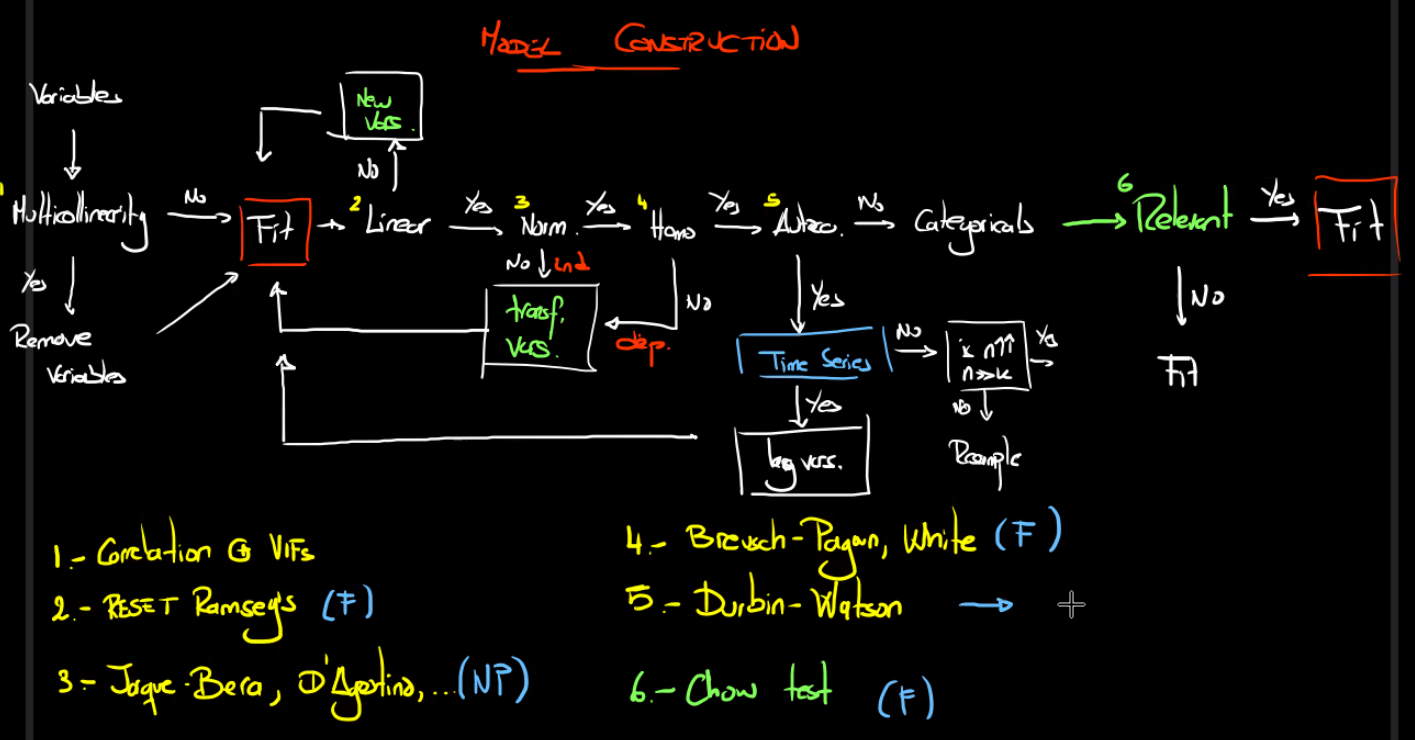

### Estimation of slopes of the model (Beta coefficients estimation)

- **Problem with perfect multicollinearity:** when you go to the estimation of the slopes (assumption of normal distribution), the problem is that the standard error is essentially proportional to 1/(1-R**2). This is the main problem, this expression dependent of the determination coefficient.

- **IMPORTANT**: the determination coefficient used to calculate the variance inflation factor of the slope of each variable is the determination coefficient corresponding to the linear regression of that variable on all the other variables.

We have a problem when this **determination coefficient is 1**, that is, when **perfect multicollinearity occurs**. In this case, the **variance inflation factor** tends to infinity -> **the standard error tends to infininty** -> the t-statistic is then 0. There are **no confindence intervals**, we lose everything. That is why we require no perfect multicollinearity.

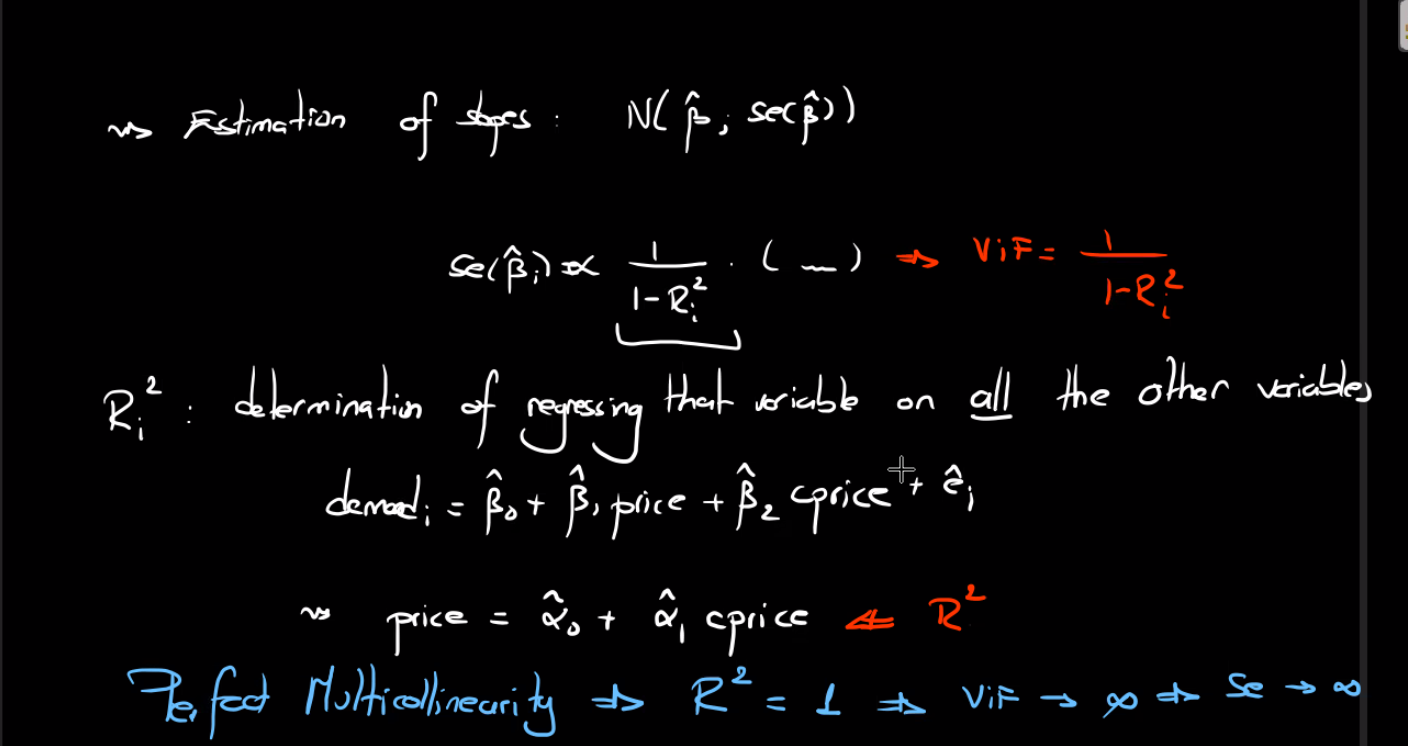

### Limit to the variance inflation factor.

The specific criterio dependes on you.

Once you detect a high VIF --> remove one of the variables from the model. To avoid this perfect multicollinearity. Its an **incredibliy non-formal way of making dimensional reduction**.

**In essence, variable inflation factor is a way of testing autocorrelation**

STEPS: 

- You have the variables, you assess the variable inflation factor.

The other possibility to test auto-correlation, the **Durbin-Watson** test, will be explained later on, when we move into the tests.

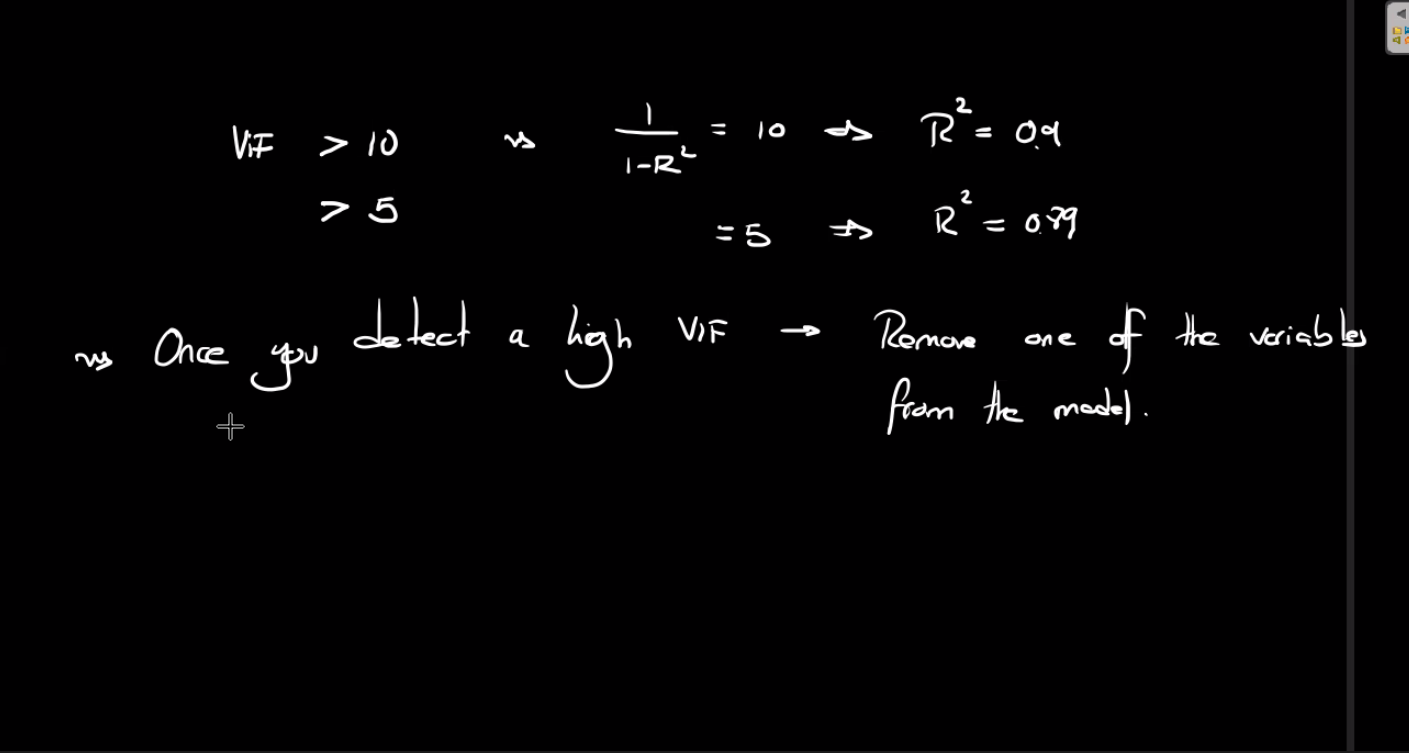

### Graphical Analysis

There is a graphical analysis that we make with the residuals.
- Residuals Plot @45

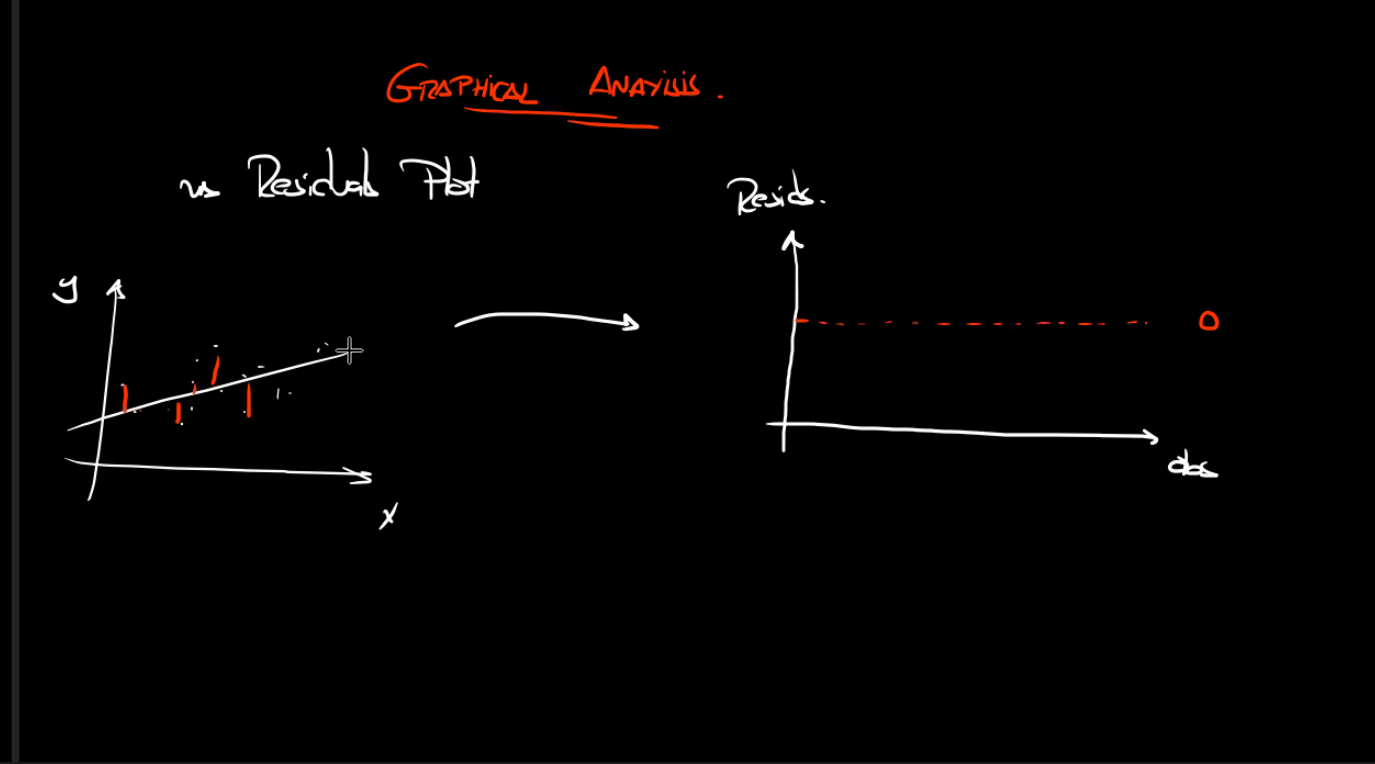

### Validation using the residual plots. 

Can be used for different things

In all the cases, a good model implies random distribution of the residuals around 0. (NOrmal distribution... more around 0 that decreases towards tails)

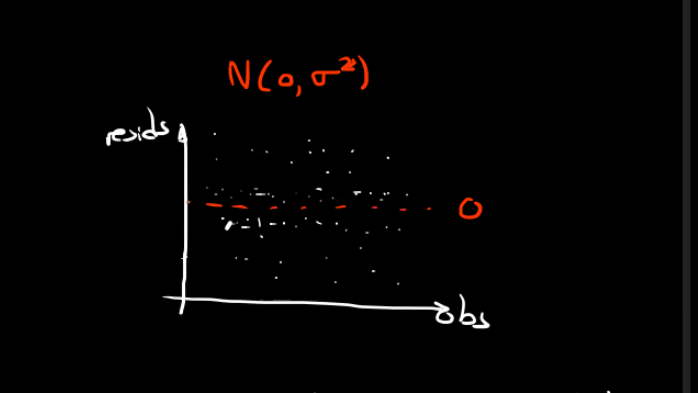

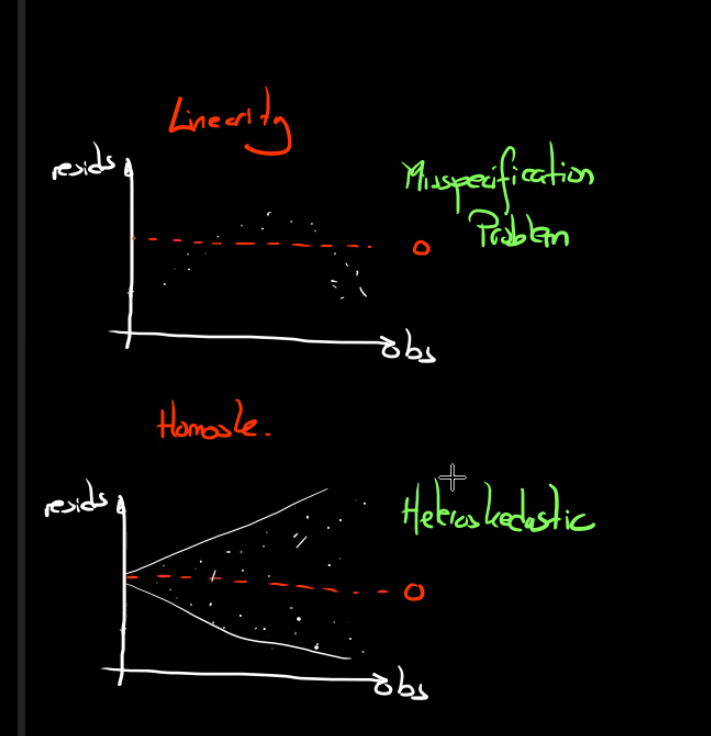

Clarification of the misspecification:

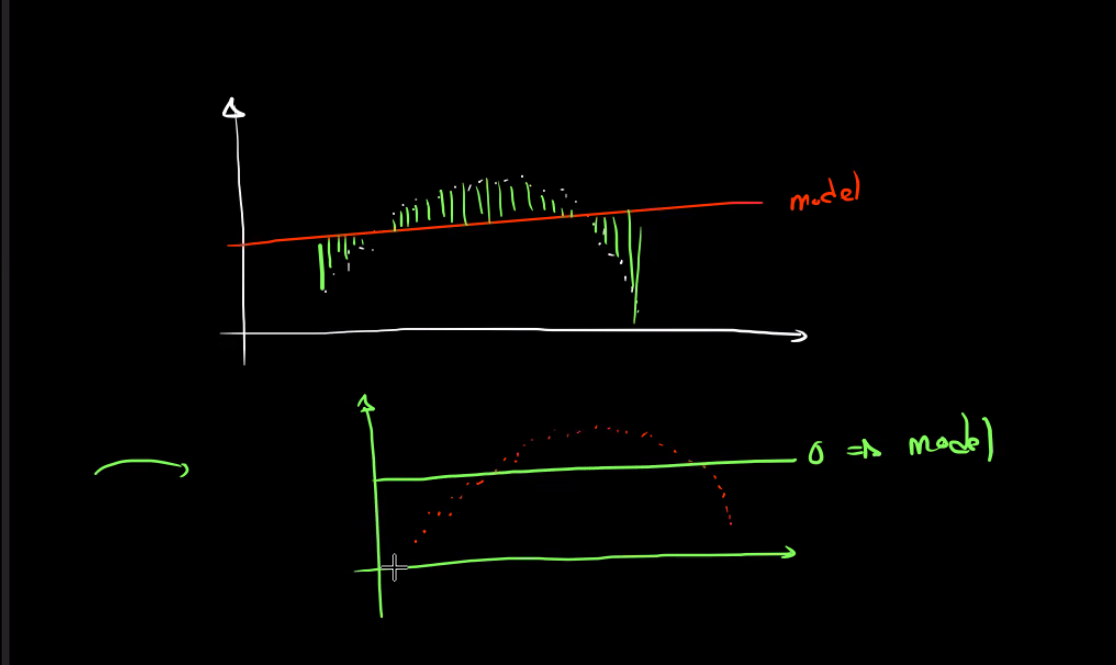

# Validation

We will import new modules

Question: please, select the numerical variables of the set

Please, select the correlation metrics


In [ ]:
gifted.head()

score  fatheriq  motheriq  speak  count  read  edutv  cartoons  parentsiq
0    159       115       117     18     26   1.9   3.00      2.00        232
1    164       117       113     20     37   2.5   1.75      3.25        230
2    154       115       118     20     32   2.2   2.75      2.50        233
3    157       113       131     12     24   1.7   2.75      2.25        244
4    156       110       109     17     34   2.2   2.25      2.50        219

In [ ]:
#Modelo en el que habíamos acordado que todo estaba por debajo del 10%
model = ols('score ~ fatheriq + motheriq + read + edutv + cartoons',
            data=gifted).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     16.54
Date:                Tue, 09 Mar 2021   Prob (F-statistic):           7.67e-08
Time:                        11:45:41   Log-Likelihood:                -81.927
No. Observations:                  36   AIC:                             175.9
Df Residuals:                      30   BIC:                             185.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     79.0468     23.740      3.330      0.0

In [ ]:
(gifted.corr())**2

score  fatheriq  motheriq  ...     edutv  cartoons  parentsiq
score      1.000000  0.035374  0.326317  ...  0.137092  0.060074   0.358330
fatheriq   0.035374  1.000000  0.000616  ...  0.013507  0.061678   0.206765
motheriq   0.326317  0.000616  1.000000  ...  0.108899  0.114527   0.772783
speak      0.071766  0.000933  0.005211  ...  0.023878  0.011960   0.002475
count      0.296161  0.005628  0.000589  ...  0.046517  0.023994   0.000200
read       0.275832  0.004654  0.001852  ...  0.027743  0.015809   0.005022
edutv      0.137092  0.013507  0.108899  ...  1.000000  0.852736   0.056922
cartoons   0.060074  0.061678  0.114527  ...  0.852736  1.000000   0.033519
parentsiq  0.358330  0.206765  0.772783  ...  0.056922  0.033519   1.000000

[9 rows x 9 columns]

Correlation between the explanatory variables.

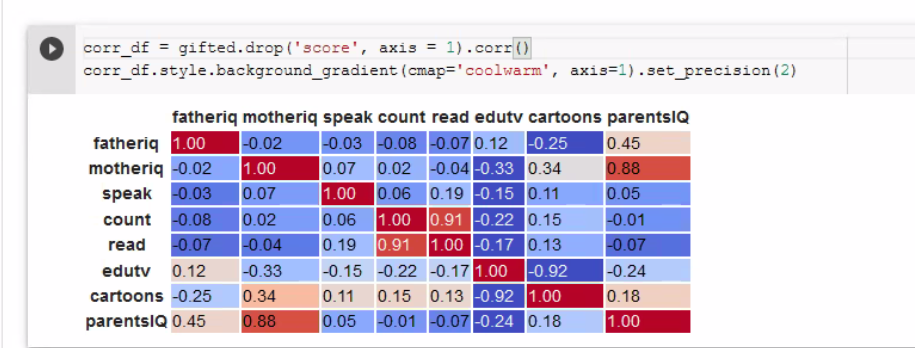

In [ ]:
corr_df = gifted.drop('score', axis = 1).corr()**2
corr_df.style.background_gradient(cmap='coolwarm', axis=1).set_precision(2)

If you think that this correlations are big, you should remove one of the variables. Either you remove one or the other, completely arbitrary which one you keep.

In any case, lets find the variance inflation factor
One dataframe. One of the column s VIF and...

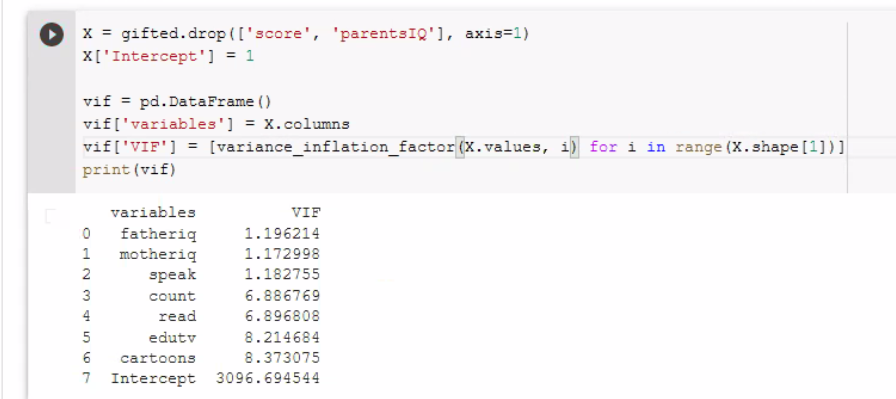

Count and read > 5 . If you put the boundary at 5, you need to remove one of them

Of you put the boundary at 10, you ma tremove everything

@Explanation of why he removes both cartoons andedu tv @ 1h:12m:01s

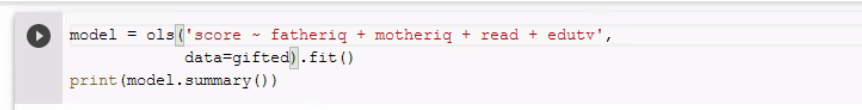

A noble prize said once that multicollinearity (not perfect) tend to dissapear with large samples, so its not that important

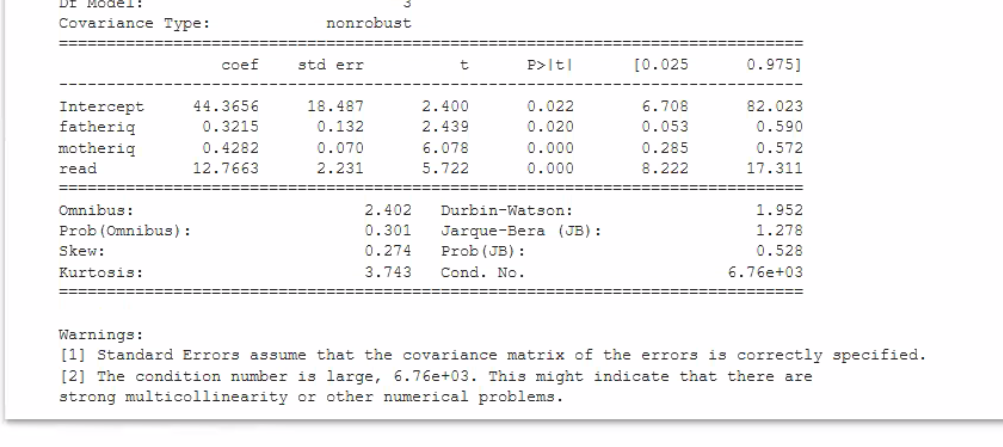

@Minute 1h:17m.

We need a new package, to analyze the outliers influence.

### Linearity

We are going to perform a Ramsey's RESET test

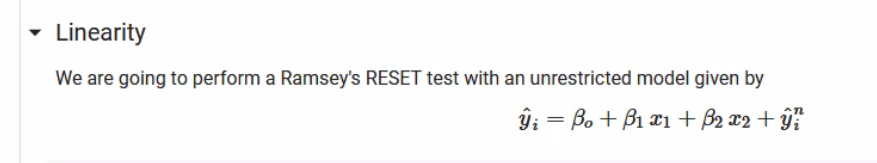

In python Ramseys test can only go up to power 5. 

If you should go to power 5, you should not use the linear model. It's absurd that you need 5 powers to correct the linearity of the model.

This means just 

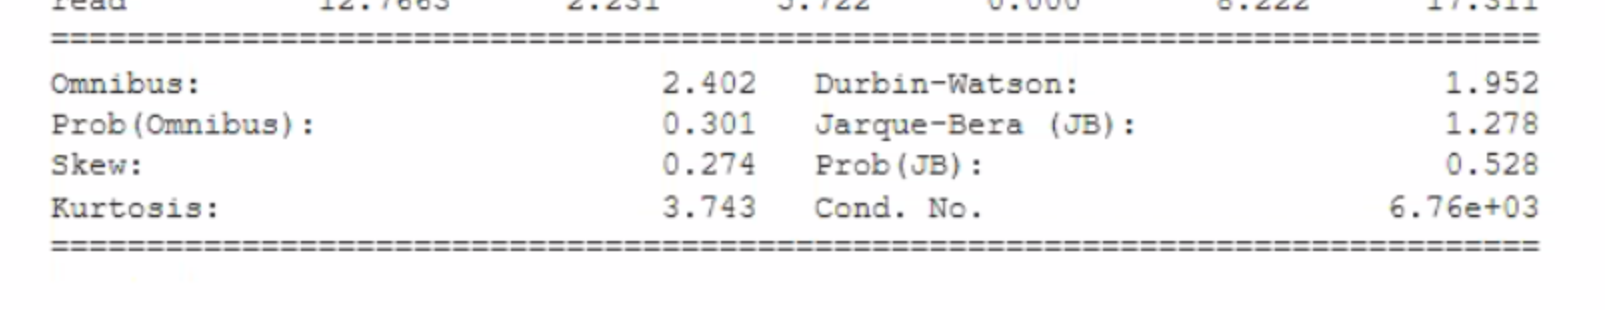

Comenta esto hacia el minuto 5.
Tenemos Kurtosis and not excess kurtosis.

In this validation Ho means everything is right. H1 means sth is wrong.

For ramsey we need to decide a degree. Do not go beyond 3. The non-linearities will be too strong. 

Ramsey is a multiple restriction test. We have the model without powers and the model with powers

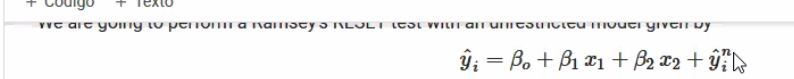

In [ ]:
sso.reset_ramsey(model, degree= 2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[0.15367834]]), p=0.6979108829366178, df_denom=29, df_num=1>

This is all WRONG. Look at her class Class LM

### Zero Expected Value and Normality

This is a property required to the residuals. These must be distributed as a $N(0,\sigma)$, where sigma is unknown

He sees that $E[\hat e] = 0$

Now we check normality. We can use:

- Shapiro-Wilk
- D'Agostino
- Jaque-Bera (non-parametric)

tests and consider that **as soon as one of them fails, normality fails**

These tests are in scipyy.stats

In [ ]:
s_stats, s_pval = ss.shapiro(residuals)
d_stats, d_pval = ss.normaltest(residuals)

s_pval, d_pval

(0.6398441791534424, 0.5935260715947364)

Normality of the residuals is very important. If we do not have them, we... @min 20.

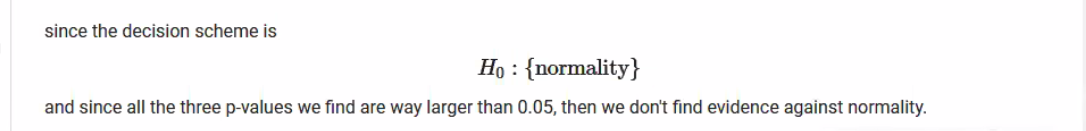